In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

random_seed = 0
np.random.seed(random_seed)

import warnings
warnings.filterwarnings('ignore')

In [16]:
train_filepath = "C:/Users/donat/Desktop/Programming Projects/Python Projects/Iowa_Competition/train.csv"
test_filepath = "C:/Users/donat/Desktop/Programming Projects/Python Projects/Iowa_Competition/test.csv"
train = pd.read_csv(train_filepath)
test = pd.read_csv(test_filepath)

# Concatenate the two DataFrames vertically
#merged_df = pd.concat([train, test], ignore_index=True)

In [17]:
# Drop duplicate rows from the DataFrame in place
train.drop_duplicates(inplace=True)

train.drop(columns=['Id'])

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave   NaN      Reg   
1             20       RL         80.0     9600   Pave   NaN      Reg   
2             60       RL         68.0    11250   Pave   NaN      IR1   
3             70       RL         60.0     9550   Pave   NaN      IR1   
4             60       RL         84.0    14260   Pave   NaN      IR1   
5             50       RL         85.0    14115   Pave   NaN      IR1   
6             20       RL         75.0    10084   Pave   NaN      Reg   
7             60       RL          NaN    10382   Pave   NaN      IR1   
8             50       RM         51.0     6120   Pave   NaN      Reg   
9            190       RL         50.0     7420   Pave   NaN      Reg   
10            20       RL         70.0    11200   Pave   NaN      Reg   
11            60       RL         85.0    11924   Pave   NaN      IR1   
12            20       RL          NaN    12968   Pave   NaN      IR2   
13            20       RL         91.0    10652   Pave   NaN      IR1   
14            20       RL          NaN    10920   Pave   NaN      IR1   
15            45       RM         51.0     6120   Pave   NaN      Reg   
16            20       RL          NaN    11241   Pave   NaN      IR1   
17            90       RL         72.0    10791   Pave   NaN      Reg   
18            20       RL         66.0    13695   Pave   NaN      Reg   
19            20       RL         70.0     7560   Pave   NaN      Reg   
20            60       RL        101.0    14215   Pave   NaN      IR1   
21            45       RM         57.0     7449   Pave  Grvl      Reg   
22            20       RL         75.0     9742   Pave   NaN      Reg   
23           120       RM         44.0     4224   Pave   NaN      Reg   
24            20       RL          NaN     8246   Pave   NaN      IR1   
25            20       RL        110.0    14230   Pave   NaN      Reg   
26            20       RL         60.0     7200   Pave   NaN      Reg   
27            20       RL         98.0    11478   Pave   NaN      Reg   
28            20       RL         47.0    16321   Pave   NaN      IR1   
29            30       RM         60.0     6324   Pave   NaN      IR1   
30            70  C (all)         50.0     8500   Pave  Pave      Reg   
31            20       RL          NaN     8544   Pave   NaN      IR1   
32            20       RL         85.0    11049   Pave   NaN      Reg   
33            20       RL         70.0    10552   Pave   NaN      IR1   
34           120       RL         60.0     7313   Pave   NaN      Reg   
35            60       RL        108.0    13418   Pave   NaN      Reg   
36            20       RL        112.0    10859   Pave   NaN      Reg   
37            20       RL         74.0     8532   Pave   NaN      Reg   
38            20       RL         68.0     7922   Pave   NaN      Reg   
39            90       RL         65.0     6040   Pave   NaN      Reg   
40            20       RL         84.0     8658   Pave   NaN      Reg   
41            20       RL        115.0    16905   Pave   NaN      Reg   
42            85       RL          NaN     9180   Pave   NaN      IR1   
43            20       RL          NaN     9200   Pave   NaN      IR1   
44            20       RL         70.0     7945   Pave   NaN      Reg   
45           120       RL         61.0     7658   Pave   NaN      Reg   
46            50       RL         48.0    12822   Pave   NaN      IR1   
47            20       FV         84.0    11096   Pave   NaN      Reg   
48           190       RM         33.0     4456   Pave   NaN      Reg   
49            20       RL         66.0     7742   Pave   NaN      Reg   
50            60       RL          NaN    13869   Pave   NaN      IR2   
51            50       RM         52.0     6240   Pave   NaN      Reg   
52            90       RM        110.0     8472   Grvl   NaN      IR2   
53            20       RL         68.0    50271   Pave   NaN    

In [18]:
def dataset_summary(dataset, show_all_columns=True, visualize=True):
    
    # Set Pandas display options to show all columns without truncation
    pd.set_option('display.max_columns', None)

    # Get dataset shape
    dataset_shape = dataset.shape

    # Calculate missing data statistics
    total_cells = np.product(dataset_shape)
    total_missing = dataset.isnull().sum().sum()
    percent_missing = (total_missing / total_cells) * 100

    # Display dataset shape and missing data statistics
    print("------------------------------------")
    print("                     DATASET SUMMARY")
    print("------------------------------------")
    print("     Shape")
    print("------------------------------------")
    print(f"Dataset Shape: {dataset_shape}")
    print(f"Total Cells: {total_cells}")
    print("------------------------------------")
    print("     Missing data ")
    print("------------------------------------")
    print(f"Total Missing: {total_missing}")
    print(f"Percentage of Missing Data: {percent_missing:.2f}%")
    print("------------------------------------")
    print("     Data Types and Counts")
    print("------------------------------------")
    dtype_counts = dataset.dtypes.value_counts()
    for dtype, count in dtype_counts.items():
        print(f"{dtype}: {count}")
    print("------------------------------------")

    # Calculate missing data statistics
    missing_values = dataset.isnull().sum()

    # Calculate cardinality
    cardinalities = dataset.nunique()

    # Get data types
    data_types = dataset.dtypes

    # Create a Dataet for all columns
    all_info_df = pd.DataFrame({
        'Column Name': dataset.columns,
        'Data Type': data_types.values,
        'Cardinality': cardinalities.values,
        'Missing Values': missing_values.values
    })

    # Group columns by data type
    data_type_groups = all_info_df.groupby('Data Type')

    for dtype, group in data_type_groups:
        print("------------------------------------")
        print(f"     {dtype} Columns")
        print("------------------------------------")
        if show_all_columns:
            print(group)
        else:
            non_zero_missing_info_df = group[group['Missing Values'] > 0]
            print(non_zero_missing_info_df)
        print("------------------------------------")
        
    if visualize:
        # Identify columns with missing values
        columns_with_missing = dataset.columns[dataset.isnull().any()]
    
        # Check if there are any columns with missing values
        if not columns_with_missing.empty:
            # Calculate missing data statistics
            total_cells = np.product(dataset.shape)
            total_missing = dataset.isnull().sum().sum()
            percent_missing = (total_missing / total_cells) * 100
    
            # Visualize missing data for columns with missing values
            plt.figure(figsize=(12, 6))
            plt.subplot(1, 2, 1)
            sns.heatmap(dataset[columns_with_missing].isnull(), cmap='viridis', cbar=False, yticklabels=False)
            plt.title('Missing Data Visualization')
    
            plt.tight_layout()
            plt.show()
        else:
            print("No columns with missing values found. Visualization skipped.")
    else:
        print("")
    
    return ""

------------------------------------
                     DATASET SUMMARY
------------------------------------
     Shape
------------------------------------
Dataset Shape: (1460, 81)
Total Cells: 118260
------------------------------------
     Missing data 
------------------------------------
Total Missing: 6965
Percentage of Missing Data: 5.89%
------------------------------------
     Data Types and Counts
------------------------------------
object: 43
int64: 35
float64: 3
------------------------------------
------------------------------------
     int64 Columns
------------------------------------
      Column Name Data Type  Cardinality  Missing Values
0              Id     int64         1460               0
1      MSSubClass     int64           15               0
4         LotArea     int64         1073               0
17    OverallQual     int64           10               0
18    OverallCond     int64            9               0
19      YearBuilt     int64          112   

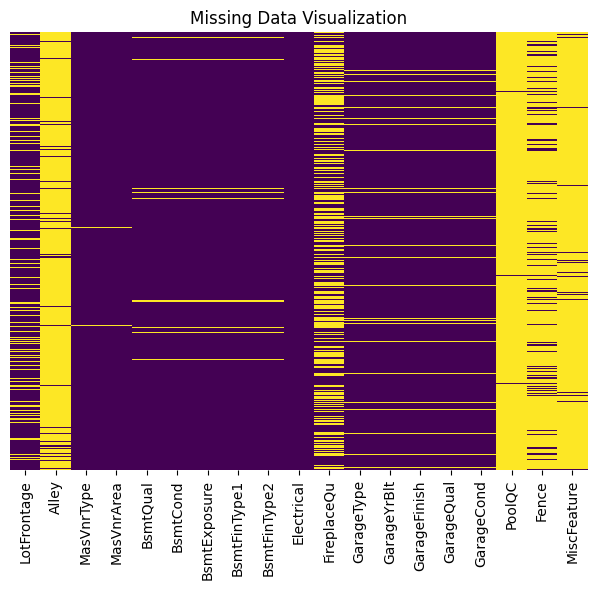

''

In [19]:
dataset_summary(train, show_all_columns=True, visualize=True)

In [20]:
train['LotFrontage'].fillna(0, inplace=True)
train['MasVnrArea'].fillna(0, inplace=True)
train['GarageYrBlt'].fillna(0, inplace=True)

------------------------------------
                     DATASET SUMMARY
------------------------------------
     Shape
------------------------------------
Dataset Shape: (1460, 81)
Total Cells: 118260
------------------------------------
     Missing data 
------------------------------------
Total Missing: 6617
Percentage of Missing Data: 5.60%
------------------------------------
     Data Types and Counts
------------------------------------
object: 43
int64: 35
float64: 3
------------------------------------
------------------------------------
     int64 Columns
------------------------------------
Empty DataFrame
Columns: [Column Name, Data Type, Cardinality, Missing Values]
Index: []
------------------------------------
------------------------------------
     float64 Columns
------------------------------------
Empty DataFrame
Columns: [Column Name, Data Type, Cardinality, Missing Values]
Index: []
------------------------------------
------------------------------------
 

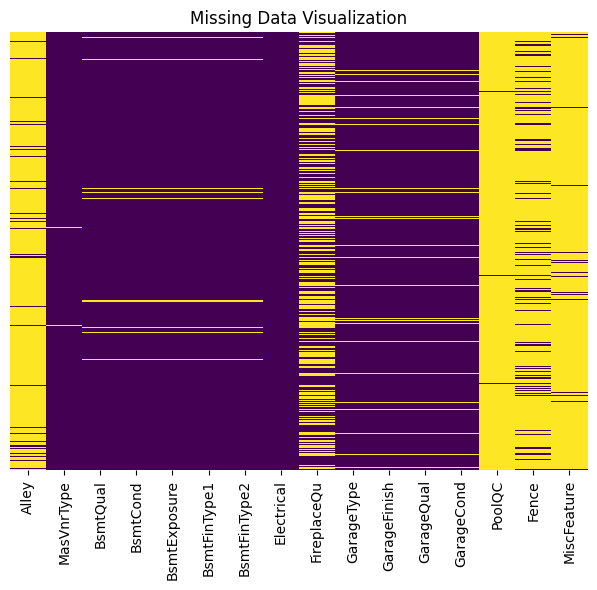

''

In [21]:
dataset_summary(train, show_all_columns=False, visualize=True)

In [22]:
columns_to_original_encode = ['GarageType', 'LotShape', 'LandContour', 
                              'LandSlope', 'ExterQual', 'ExterCond', 
                              'BsmtQual', 'BsmtCond', 'BsmtExposure',
                              'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
                              'KitchenQual', 'FireplaceQu', 'GarageFinish',
                              'GarageQual', 'GarageCond', 'PoolQC',
                              'Fence']

# Initialize the ordinal encoder
encoder = OrdinalEncoder()

for column in columns_to_original_encode:
    # Handle missing values by replacing with "NA" and then encoding
    train[column].fillna("NA", inplace=True)
    train[column] = encoder.fit_transform(train[[column]])

In [23]:
columns_to_frequency_encode = ['MSZoning', 'Utilities', 'LotConfig',
                               'Neighborhood', 'Condition1', 'Condition2',
                               'BldgType', 'HouseStyle', 'RoofStyle',
                               'RoofMatl', 'Exterior1st', 'Exterior2nd',
                               'MasVnrType', 'Foundation', 'Heating',
                               'Electrical', 'Functional', 'MiscFeature',
                               'SaleType', 'SaleCondition']

for column in columns_to_frequency_encode:
    train[column].fillna("NA", inplace=True)

    # Calculate frequency of each category in the current column
    category_frequencies = train[column].value_counts(normalize=True)

    # Replace categories with their frequencies
    train[column] = train[column].map(category_frequencies)

In [24]:
columns_to_one_hot_encode = ['Street', 'Alley', 'PavedDrive', 'CentralAir']

# Create an empty DataFrame to store the one-hot encoded columns
one_hot_encoded_df = pd.DataFrame()
for column in columns_to_one_hot_encode:
    train[column].fillna("NA", inplace=True)

    # Apply one-hot encoding to the current column
    one_hot_encoded_column = pd.get_dummies(train[column], prefix=column, prefix_sep='_')

    # Concatenate the one-hot encoded column with the new DataFrame
    one_hot_encoded_df = pd.concat([one_hot_encoded_df, one_hot_encoded_column], axis=1)

# Convert boolean values to integers (0s and 1s)
one_hot_encoded_df = one_hot_encoded_df.astype(int)

# Concatenate the one-hot encoded DataFrame with the original DataFrame
train = pd.concat([train, one_hot_encoded_df], axis=1)

# Drop the original columns that were one-hot encoded
train.drop(columns=columns_to_one_hot_encode, inplace=True)

In [25]:
dataset_summary(train, show_all_columns=False, visualize=True)

------------------------------------
                     DATASET SUMMARY
------------------------------------
     Shape
------------------------------------
Dataset Shape: (1460, 87)
Total Cells: 127020
------------------------------------
     Missing data 
------------------------------------
Total Missing: 0
Percentage of Missing Data: 0.00%
------------------------------------
     Data Types and Counts
------------------------------------
float64: 42
int64: 35
int32: 10
------------------------------------
------------------------------------
     int32 Columns
------------------------------------
Empty DataFrame
Columns: [Column Name, Data Type, Cardinality, Missing Values]
Index: []
------------------------------------
------------------------------------
     int64 Columns
------------------------------------
Empty DataFrame
Columns: [Column Name, Data Type, Cardinality, Missing Values]
Index: []
------------------------------------
------------------------------------
     f

''

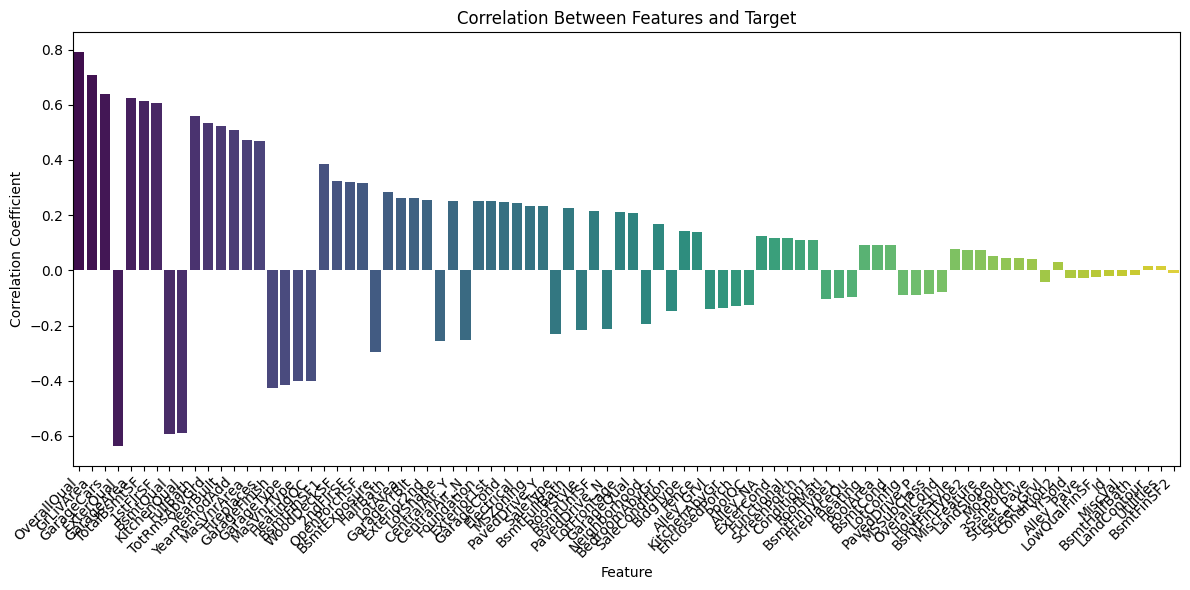

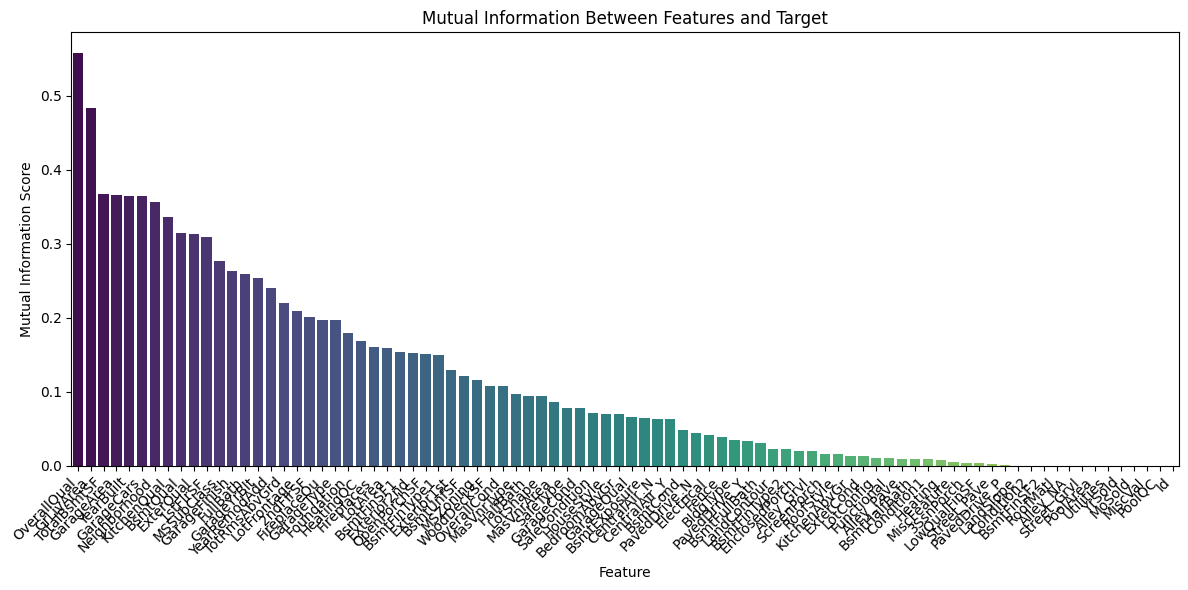

In [26]:
def plot_correlation(features, target, descending=True):
    # Calculate correlation between features and target
    correlations = features.corrwith(target)

    # Sort features by correlation
    sorted_correlations = correlations.abs().sort_values(ascending=not descending)

    # Plot the correlations using a bar plot
    plt.figure(figsize=(12, 6))
    sns.barplot(x=sorted_correlations.index, y=correlations[sorted_correlations.index], palette="viridis")
    plt.title('Correlation Between Features and Target')
    plt.xlabel('Feature')
    plt.ylabel('Correlation Coefficient')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

def plot_mutual_information(features, target, descending=True):
    # Standardize numerical features
    numerical_features = features.select_dtypes(include=['float64', 'int64']).columns
    features[numerical_features] = StandardScaler().fit_transform(features[numerical_features])

    # Calculate mutual information between features and target
    mi_scores = mutual_info_regression(features, target, discrete_features='auto', random_state=42)

    # Create a DataFrame for easier sorting
    mi_df = pd.DataFrame({'Feature': features.columns, 'Mutual_Information': mi_scores})
    
    # Sort features by mutual information
    sorted_mi_df = mi_df.sort_values(by='Mutual_Information', ascending=not descending)

    # Plot the mutual information scores using a bar plot
    plt.figure(figsize=(12, 6))
    sns.barplot(x=sorted_mi_df['Feature'], y=sorted_mi_df['Mutual_Information'], palette="viridis")
    plt.title('Mutual Information Between Features and Target')
    plt.xlabel('Feature')
    plt.ylabel('Mutual Information Score')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

target_column = 'SalePrice'
features = train.drop(columns=[target_column])
target = train[target_column]

# Plot correlation in descending order
plot_correlation(features, target, descending=True)

# Plot mutual information in descending order
plot_mutual_information(features, target, descending=True)

In [27]:
def correlation_table(features, target, descending=True):
    # Set Pandas display options to show all columns without truncation
    pd.set_option('display.max_rows', None)

    # Calculate correlation between features and target
    correlations = features.corrwith(target)

    # Sort features by correlation
    sorted_correlations = correlations.abs().sort_values(ascending=not descending)

    # Create a DataFrame for the table
    correlation_table = pd.DataFrame({'Column Name': sorted_correlations.index, 'Correlation': correlations[sorted_correlations.index]})

    return correlation_table

def mutual_information_table(features, target, descending=True):
    # Set Pandas display options to show all columns without truncation
    pd.set_option('display.max_rows', None)

    # Standardize numerical features
    numerical_features = features.select_dtypes(include=['float64', 'int64']).columns
    features[numerical_features] = StandardScaler().fit_transform(features[numerical_features])

    # Calculate mutual information between features and target
    mi_scores = mutual_info_regression(features, target, discrete_features='auto', random_state=42)

    # Create a DataFrame for the table
    mi_table = pd.DataFrame({'Column Name': features.columns, 'Mutual Information': mi_scores})
    
    # Sort features by mutual information
    mi_table = mi_table.sort_values(by='Mutual Information', ascending=not descending)

    return mi_table

def combined_feature_importance(features, target, descending=True):
    # Calculate correlation table
    correlation_result = correlation_table(features, target, descending=False)

    # Calculate mutual information table
    mi_result = mutual_information_table(features, target, descending=False)

    # Merge the two results on 'Column Name'
    combined_result = pd.merge(correlation_result, mi_result, on='Column Name')

    # Compute the mean of absolute values of correlation and mutual information
    combined_result['Mean_Abs_Score'] = combined_result[['Correlation', 'Mutual Information']].abs().mean(axis=1)

    # Sort the result by the mean absolute score
    combined_result = combined_result.sort_values(by='Mean_Abs_Score', ascending=descending)

    return combined_result[['Column Name','Mean_Abs_Score']]

target_column = 'SalePrice'
features = train.drop(columns=[target_column])
target = train[target_column]

# Get combined feature importance table in descending order
combined_result = combined_feature_importance(features, target, descending=True)
print(combined_result)


      Column Name  Mean_Abs_Score
0      BsmtFinSF2        0.005689
1       Utilities        0.007157
4         MiscVal        0.010595
5              Id        0.010958
3    BsmtHalfBath        0.013077
8          YrSold        0.014461
6    LowQualFinSF        0.014632
9      Condition2        0.015307
7      Alley_Pave        0.018572
2     LandContour        0.018990
10    Street_Grvl        0.020518
11    Street_Pave        0.021982
13         MoSold        0.023216
12      3SsnPorch        0.024380
14      LandSlope        0.025730
15    MiscFeature        0.038920
20   PavedDrive_P        0.045160
23       PoolArea        0.046202
16   BsmtFinType2        0.047372
21      LotConfig        0.049921
24        Heating        0.050459
27       RoofMatl        0.052295
28     Condition1        0.059534
32       Alley_NA        0.061806
33         PoolQC        0.063035
30     Functional        0.063454
29    ScreenPorch        0.063814
31      ExterCond        0.064923
22       BsmtC

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load features and target datasets
# Assuming 'features_df' is your DataFrame with feature columns
# and 'target_df' is your DataFrame with the target variable column

# Merge features and target into a single DataFrame
merged_df = pd.concat([features_df, target_df], axis=1)

# Split merged DataFrame into features and target
features = merged_df.drop(columns=['target_column'])
target = merged_df['target_column']

# Split the data into training and testing sets
# Adjust the test_size and random_state as needed
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
# You can adjust hyperparameters such as n_estimators, max_depth, etc.
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
random_forest_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = random_forest_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")


NameError: name 'features_df' is not defined